In [99]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [100]:
movies = pd.read_csv('movies_cleaned.csv')

In [101]:
movies = movies.select_dtypes(object)

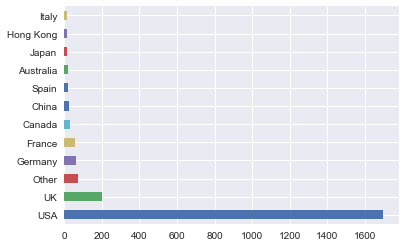

In [102]:
countries = movies['Country'].value_counts().reset_index()
countries.columns = ['Country', 'Counts']
countries = countries[countries['Counts'] < 10]['Country']
movies.loc[movies['Country'].isin(countries), 'Country'] = 'Other'
movies['Country'].value_counts().plot(kind='barh');

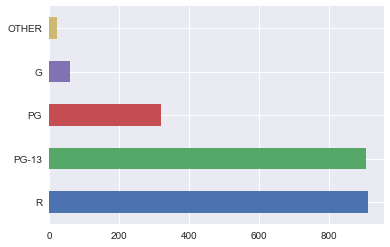

In [103]:
mpaa = movies['MPAA'].str.split(', ').apply(pd.Series).stack().value_counts().reset_index()
mpaa.columns = ['MPAA', 'Counts']
mpaa = mpaa[mpaa['Counts'] < 50]['MPAA']
movies.loc[movies['MPAA'].isin(mpaa), 'MPAA'] = 'OTHER'
movies['MPAA'].value_counts().plot(kind='barh');

In [104]:
prodco = movies['ProdCo'].str.split(', ').apply(pd.Series).stack()
prodco_ = prodco.reset_index()
prodco_.columns = ['ID', 'ProdCoNum', 'ProdCo']
prodco = prodco.value_counts().reset_index()
prodco.columns = ['ProdCo', 'Counts']
prodco = prodco[prodco['Counts'] < 30]['ProdCo']
prodco_.loc[prodco_['ProdCo'].isin(prodco), 'ProdCo'] = 'Other'
prodco = prodco_.groupby('ID')['ProdCo'].apply(lambda i: ', '.join(i)).reset_index()
prodco.set_index('ID', inplace=True)
movies = movies.join(prodco, lsuffix='ID').drop('ProdCoID', axis=1)

In [106]:
stars = movies['Stars'].str.split(', ').apply(pd.Series).stack()
stars_ = stars.reset_index()
stars_.columns = ['ID', 'StarsNum', 'Stars']
stars = stars.value_counts().reset_index()
stars.columns = ['Stars', 'Counts']
stars = stars[stars['Counts'] < 10]['Stars']
stars_.loc[stars_['Stars'].isin(stars), 'Stars'] = 'Other'
stars = stars_.groupby('ID')['Stars'].apply(lambda i: ', '.join(i)).reset_index()
stars.set_index('ID', inplace=True)
movies = movies.join(stars, lsuffix='ID').drop('StarsID', axis=1)

In [110]:
movies.to_csv('movies_cat.csv', index=False)